# 80um Model

- 25um Model과 identical함

## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Load Dataset

`80um`에 대해 분석 진행

In [451]:
taget_diameter = '80'
nontaget_diameter = '25'

In [452]:
X = pd.read_pickle(f'dataset//{taget_diameter}um/X.pkl')

In [453]:
X.shape

(17, 2230)

In [454]:
y = pd.read_csv('dataset/etch_depth.csv')

`y`의 웨이퍼 이름 (`wafer`)을 `X`와 동일하게 변경

In [455]:
y = y.drop([f'{nontaget_diameter}um'], axis=1)

In [456]:
y['wafer'] = [name.split('.')[0] for name in y['wafer']]

In [457]:
fault_wafer_name = [f'{taget_diameter}um_Fault_{name}' for name in y['wafer'][:5]]
normal_wafer_name = [f'{taget_diameter}um_wafer_{name}' for name in y['wafer'][5:]]

In [458]:
new_wafer_name = fault_wafer_name + normal_wafer_name

In [459]:
y['wafer'] = new_wafer_name

In [460]:
y = y.set_index('wafer')

## 1_1. Perform PCA

In [461]:
from pca import pca

In [462]:
pca_ = pca(normalize=True, verbose=0)
result = pca_.fit_transform(X)

In [463]:
pc_cut = 3

### PCR

In [62]:
from sklearn.linear_model import LinearRegression

In [449]:
pc = pca_.results['PC'].iloc[:, :pc_cut]
x_arr = pc.to_numpy()
y_arr = y.to_numpy()

loo = LeaveOneOut()

y_test_res = []
y_pred_res = []

for train_idx, test_idx in loo.split(pc):
    X_train, X_test = x_arr[train_idx], x_arr[test_idx]
    y_train, y_test = y_arr[train_idx], y_arr[test_idx]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    y_test_res += list(y_test)
    y_pred_res += list(preds)

r_sqr = r2_score(y_test_res, y_pred_res)
mae = mean_absolute_error(y_test_res, y_pred_res)
mape = mean_absolute_percentage_error(y_test_res, y_pred_res)
print(f'>>> R-Squared: {r_sqr:.4f}\n>>> MAE: {mae:.4f}\n>>> MAPE: {mape:.4%}')

>>> R-Squared: 0.3813
>>> MAE: 0.8097
>>> MAPE: 1.7654%


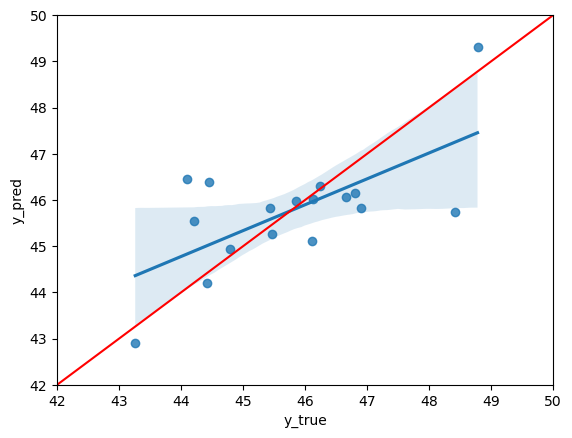

In [64]:
fig = sns.regplot(x=y_test_res, y=y_pred_res)
fig.set(ylim=(42, 50))
fig.set(ylabel='y_pred')
fig.set(xlabel='y_true')
plt.margins(x=0)
x = np.linspace(42, 50, 100)
y_ = x
plt.plot(x, y_, '-r', label='y=x')
plt.show()

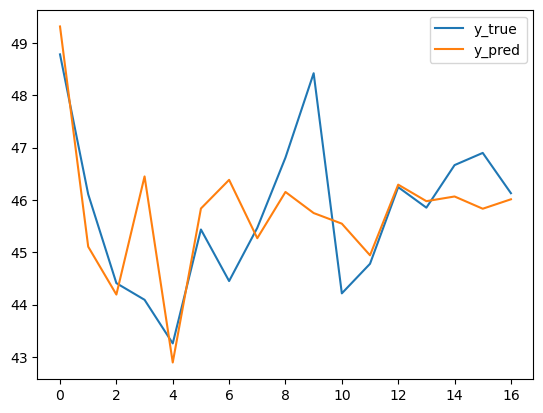

In [67]:
plt.plot(y_test_res, label = "y_true")
plt.plot(y_pred_res, label = "y_pred")
plt.legend()
plt.show()

가장 높은 성능을 내는 주성분은 PC1~PC3

## 1_2. Perform kernel PCA

In [68]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [126]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
transformer = KernelPCA(n_components=4, kernel='rbf')
x_arr = transformer.fit_transform(X_scaled)

#### kernel PCA Regression

In [127]:
y_arr = y.to_numpy()

loo = LeaveOneOut()

y_test_res = []
y_pred_res = []

for train_idx, test_idx in loo.split(x_arr):
    X_train, X_test = x_arr[train_idx], x_arr[test_idx]
    y_train, y_test = y_arr[train_idx], y_arr[test_idx]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    y_test_res += list(y_test)
    y_pred_res += list(preds)

r_sqr = r2_score(y_test_res, y_pred_res)
mae = mean_absolute_error(y_test_res, y_pred_res)
mape = mean_absolute_percentage_error(y_test_res, y_pred_res)
print(f'>>> R-Squared: {r_sqr:.4f}\n>>> MAE: {mae:.4f}\n>>> MAPE: {mape:.4%}')

>>> R-Squared: 0.2737
>>> MAE: 0.9292
>>> MAPE: 2.0298%


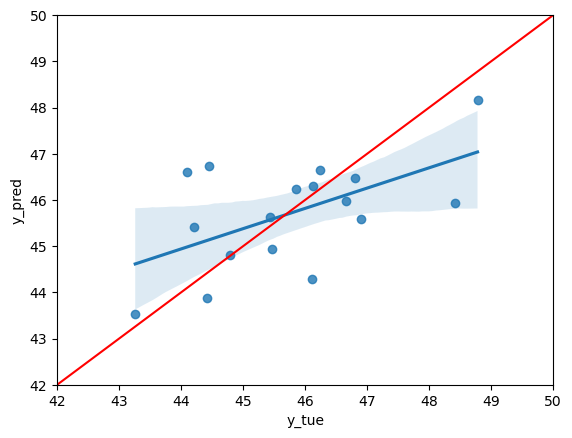

In [128]:
fig = sns.regplot(x=y_test_res, y=y_pred_res)
fig.set(ylim=(42, 50))
fig.set(ylabel='y_pred')
fig.set(xlabel='y_tue')
plt.margins(x=0)
x = np.linspace(42, 50, 100)
y_ = x
plt.plot(x, y_, '-r', label='y=x')
plt.show()

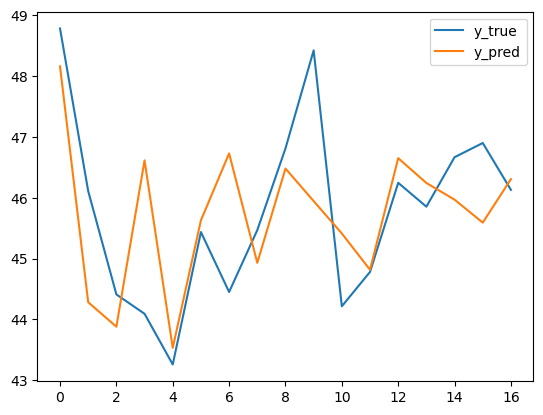

In [129]:
plt.plot(y_test_res, label = "y_true")
plt.plot(y_pred_res, label = "y_pred")
plt.legend()
plt.show()

가장 높은 성능을 내는 주성분은 PC1~PC4이고 커널함수는 'rbf'

## 2. Perform PLS

In [130]:
from sklearn.cross_decomposition import PLSRegression

In [139]:
x_arr = X.to_numpy()
y_arr = y.to_numpy()

loo = LeaveOneOut()

y_test_res = []
y_pred_res = []

for train_idx, test_idx in loo.split(x_arr):
    X_train, X_test = x_arr[train_idx], x_arr[test_idx]
    y_train, y_test = y_arr[train_idx], y_arr[test_idx]
    
    model = PLSRegression(n_components=2)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    y_test_res += list(y_test)
    y_pred_res += list(preds)

r_sqr = r2_score(y_test_res, y_pred_res)
mae = mean_absolute_error(y_test_res, y_pred_res)
mape = mean_absolute_percentage_error(y_test_res, y_pred_res)
print(f'>>> R-Squared: {r_sqr:.4f}\n>>> MAE: {mae:.4f}\n>>> MAPE: {mape:.4%}')

>>> R-Squared: -0.8708
>>> MAE: 1.3854
>>> MAPE: 3.0184%


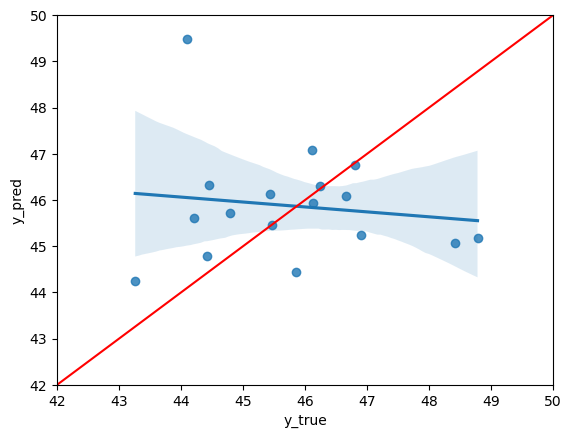

In [140]:
fig = sns.regplot(x=y_test_res, y=y_pred_res)
fig.set(ylim=(42, 50))
fig.set(ylabel='y_pred')
fig.set(xlabel='y_true')
plt.margins(x=0)
x = np.linspace(42, 50, 100)
y_ = x
plt.plot(x, y_, '-r', label='y=x')
plt.show()

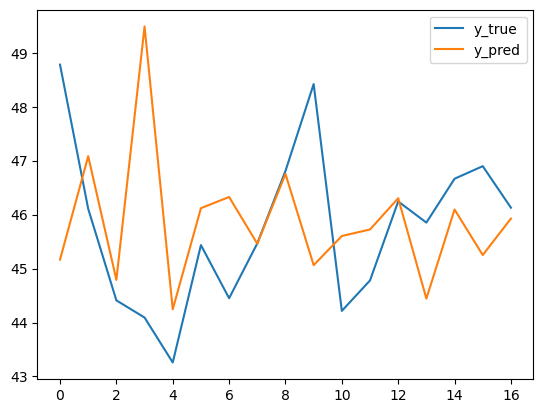

In [141]:
plt.plot(y_test_res, label = "y_true")
plt.plot(y_pred_res, label = "y_pred")
plt.legend()
plt.show()

PLS 모델은 예측 성능이 굉장이 떨어짐

Fault process에 5가지의 변수들이 조정된 값들이 들어가 있어서 그런것으로 생각됨

## 3. Gradient Boosting Regressor

Gradient Boosting Regressor 모델 사용

변수는 PCA로 추출해낸 주성분 4개 사용

`GradientBoostingRegressor` 하이퍼파라미터:
- n_estimators = 200
- subsample = 0.5

In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [464]:
pca_ = pca(normalize=True, verbose=0)
result = pca_.fit_transform(X)
pc_cut = 4
pc = pca_.results['PC'].iloc[:, :pc_cut]
x_arr = pc.to_numpy()
y_arr = y.to_numpy()

loo = LeaveOneOut()

y_test_res = []
y_pred_res = []

for train_idx, test_idx in loo.split(x_arr):
    X_train, X_test = x_arr[train_idx], x_arr[test_idx]
    y_train, y_test = y_arr[train_idx], y_arr[test_idx]
    
    n_estimators = 200
    subsample = 0.5
    model = GradientBoostingRegressor(n_estimators=n_estimators, criterion='squared_error', subsample=subsample)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    y_test_res += list(y_test)
    y_pred_res += list(preds)


r_sqr = r2_score(y_test_res, y_pred_res)
mae = mean_absolute_error(y_test_res, y_pred_res)
mape = mean_absolute_percentage_error(y_test_res, y_pred_res)
print(f'>>> R-Squared: {r_sqr:.4f}\n>>> MAE: {mae:.4f}\n>>> MAPE: {mape:.4%}')

>>> R-Squared: 0.5564
>>> MAE: 0.7512
>>> MAPE: 1.6411%


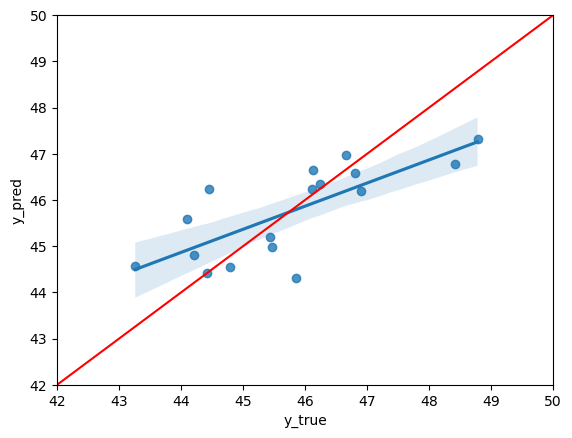

In [465]:
fig = sns.regplot(x=y_test_res, y=y_pred_res)
fig.set(ylim=(42, 50))
fig.set(ylabel='y_pred')
fig.set(xlabel='y_true')
plt.margins(x=0)
x = np.linspace(42, 50, 100)
y_ = x
plt.plot(x, y_, '-r', label='y=x')
plt.show()

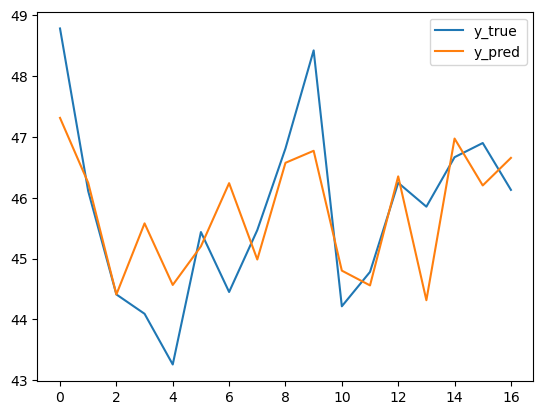

In [436]:
plt.plot(y_test_res, label = "y_true")
plt.plot(y_pred_res, label = "y_pred")
plt.legend()
plt.show()

모델의 단순성을 생각했을 때 PCR이 더 우수함